# Task 4 - Decision Tree Algorithm 
# Name :  Sirisha Gampa

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
#load dataset
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [60]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [61]:
iris.shape

(150, 6)

In [62]:
iris.drop(['Id'],axis=1,inplace=True)

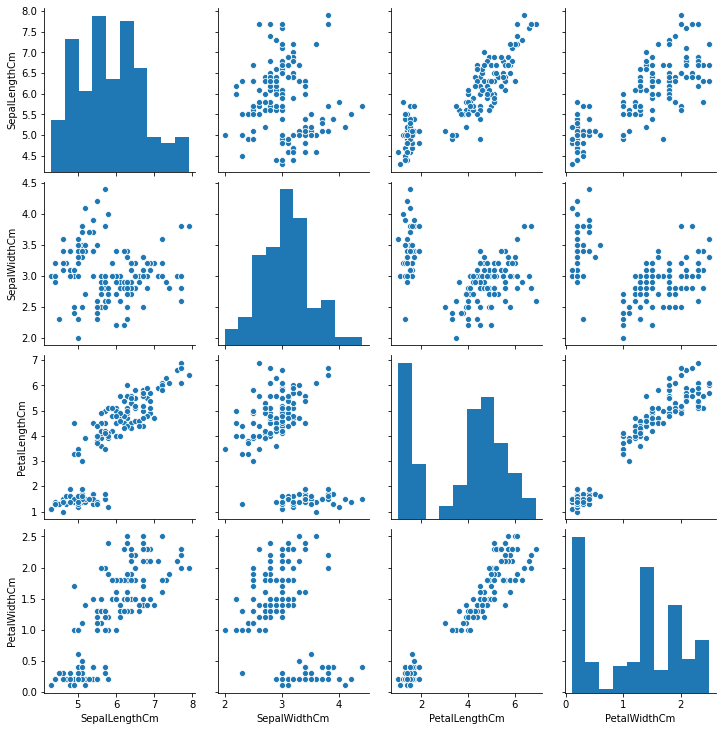

In [63]:
sns.pairplot(data=iris)

# Using decision tree classifier to fit the training data 

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x=iris.drop(['Species'],axis=1)
y=iris['Species']

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt=DecisionTreeClassifier()

In [77]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
#predicting the data
p=dt.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'Predict':p})
df.head()

,Actual,Predict
136,Iris-virginica,Iris-virginica
100,Iris-virginica,Iris-virginica
131,Iris-virginica,Iris-virginica
9,Iris-setosa,Iris-setosa
55,Iris-versicolor,Iris-versicolor


In [79]:
#Metric Evaluation
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,p))
print(accuracy_score(p,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

0.9666666666666667


In [80]:
#Tree Creation
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
features = list(iris.columns[:4])

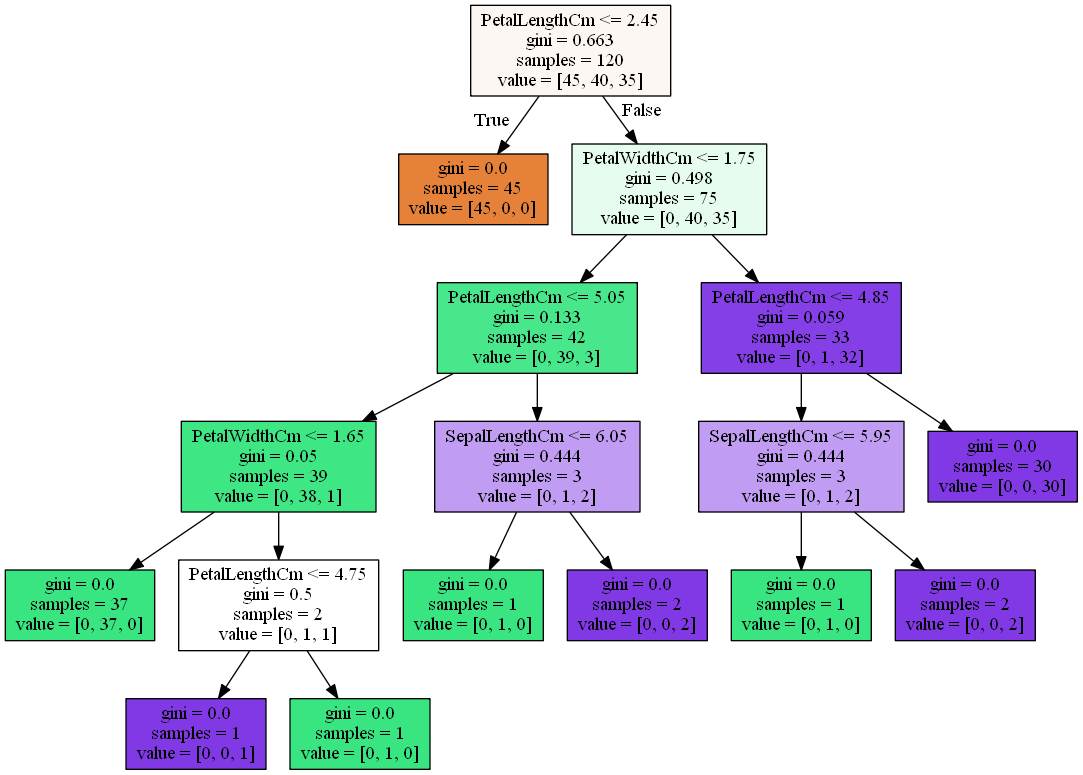

In [81]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,feature_names=features,filled=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

by sirisha gampa